In [1]:
##################################################################################################
##
##                  Partie I : lien sur les données CMIP via protocole OpenDAP
##               OpenDAP : Open-source Project for a Network Data Access Protocol
#################################################################################################

library(ncdf4)

######################################################################################################
## URL des données climatiques simulées CMIP6 par les Earth System Models (ESM) également appelés GCM
## URL récupéré à partir du portail de service climatique Européen https://climate4impact.eu
######################################################################################################

#### Modèle -> CNRM-CM6.1 (Météo-France)
##### Variable : tmin
####### Période : Historique
url_thredds <- "http://esg1.umr-cnrm.fr/thredds/dodsC/CMIP6_CNRM/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r1i1p1f2/day/tasmin/gr/v20180917/tasmin_day_CNRM-CM6-1_historical_r1i1p1f2_gr_18500101-20141231.nc"

In [2]:
## Ouverture du lien sur les données
nc <- nc_open(url_thredds)

## Récupération des coordonnées lat, lon et temps
## 
xlat <- ncvar_get(nc, varid="lat")
xlon <- ncvar_get(nc, varid="lon")
xtime <- ncvar_get(nc, varid="time")

In [8]:
nc

File http://esg1.umr-cnrm.fr/thredds/dodsC/CMIP6_CNRM/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r1i1p1f2/day/tasmin/gr/v20180917/tasmin_day_CNRM-CM6-1_historical_r1i1p1f2_gr_18500101-20141231.nc (NC_FORMAT_CLASSIC):

     3 variables (excluding dimension variables):
        double height[]   
            name: height
            standard_name: height
            long_name: height
            units: m
            axis: Z
            positive: up
        double time_bounds[axis_nbounds,time]   
            _ChunkSizes: 1
             _ChunkSizes: 2
        float tasmin[lon,lat,time]   
            online_operation: minimum
            cell_methods: area: mean time: minimum
            interval_operation: 900 s
            interval_write: 1 d
            _FillValue: 1.00000002004088e+20
            missing_value: 1.00000002004088e+20
            coordinates: height
            standard_name: air_temperature
            description: Daily Minimum Near-Surface Air Temperature
            long

In [9]:
## Transformation du temps en data
## cela va dépendre de l'information 'calendar: gregorian' et de la date d'origine de la
## simulation
## ces méta-données sont présentes dans l'objet nc précédemment créé
mydates <- as.POSIXlt((trunc(xtime))*86400, origin="1850-01-01",tz="GMT", format="%Y-%m-%d")
mydates <- as.Date(mydates)

In [10]:
mydates

[1] "1850-01-01" "1850-01-02" "1850-01-03" "1850-01-04" "1850-01-05"
    [6] "1850-01-06" "1850-01-07" "1850-01-08" "1850-01-09" "1850-01-10"
   [11] "1850-01-11" "1850-01-12" "1850-01-13" "1850-01-14" "1850-01-15"
   [16] "1850-01-16" "1850-01-17" "1850-01-18" "1850-01-19" "1850-01-20"
   [21] "1850-01-21" "1850-01-22" "1850-01-23" "1850-01-24" "1850-01-25"
   [26] "1850-01-26" "1850-01-27" "1850-01-28" "1850-01-29" "1850-01-30"
   [31] "1850-01-31" "1850-02-01" "1850-02-02" "1850-02-03" "1850-02-04"
   [36] "1850-02-05" "1850-02-06" "1850-02-07" "1850-02-08" "1850-02-09"
   [41] "1850-02-10" "1850-02-11" "1850-02-12" "1850-02-13" "1850-02-14"
   [46] "1850-02-15" "1850-02-16" "1850-02-17" "1850-02-18" "1850-02-19"
   [51] "1850-02-20" "1850-02-21" "1850-02-22" "1850-02-23" "1850-02-24"
   [56] "1850-02-25" "1850-02-26" "1850-02-27" "1850-02-28" "1850-03-01"
   [61] "1850-03-02" "1850-03-03" "1850-03-04" "1850-03-05" "1850-03-06"
   [66] "1850-03-07" "1850-03-08" "1850-03-09" "1850-03-10" "1850-03-11"
   [71] "1850-03-12" "1850-03-13" "1850-03-14" "1850-03-15" "1850-03-16"
   [76] "1850-03-17" "1850-03-18" "1850-03-19" "1850-03-20" "1850-03-21"
   [81] "1850-03-22" "1850-03-23" "1850-03-24" "1850-03-25" "1850-03-26"
   [86] "1850-03-27" "1850-03-28" "1850-03-29" "1850-03-30" "1850-03-31"
   [91] "1850-04-01" "1850-04-02" "1850-04-03" "1850-04-04" "1850-04-05"
   [96] "1850-04-06" "1850-04-07" "1850-04-08" "1850-04-09" "1850-04-10"
  [101] "1850-04-11" "1850-04-12" "1850-04-13" "1850-04-14" "1850-04-15"
  [106] "1850-04-16" "1850-04-17" "1850-04-18" "1850-04-19" "1850-04-20"
  [111] "1850-04-21" "1850-04-22" "1850-04-23" "1850-04-24" "1850-04-25"
  [116] "1850-04-26" "1850-04-27" "1850-04-28" "1850-04-29" "1850-04-30"
  [121] "1850-05-01" "1850-05-02" "1850-05-03" "1850-05-04" "1850-05-05"
  [126] "1850-05-06" "1850-05-07" "1850-05-08" "1850-05-09" "1850-05-10"
  [131] "1850-05-11" "1850-05-12" "1850-05-13" "1850-05-14" "1850-05-15"
  [136] "1850-05-16" "1850-05-17" "1850-05-18" "1850-05-19" "1850-05-20"
  [141] "1850-05-21" "1850-05-22" "1850-05-23" "1850-05-24" "1850-05-25"
  [146] "1850-05-26" "1850-05-27" "1850-05-28" "1850-05-29" "1850-05-30"
  [151] "1850-05-31" "1850-06-01" "1850-06-02" "1850-06-03" "1850-06-04"
  [156] "1850-06-05" "1850-06-06" "1850-06-07" "1850-06-08" "1850-06-09"
  [161] "1850-06-10" "1850-06-11" "1850-06-12" "1850-06-13" "1850-06-14"
  [166] "1850-06-15" "1850-06-16" "1850-06-17" "1850-06-18" "1850-06-19"
  [171] "1850-06-20" "1850-06-21" "1850-06-22" "1850-06-23" "1850-06-24"
  [176] "1850-06-25" "1850-06-26" "1850-06-27" "1850-06-28" "1850-06-29"
  [181] "1850-06-30" "1850-07-01" "1850-07-02" "1850-07-03" "1850-07-04"
  [186] "1850-07-05" "1850-07-06" "1850-07-07" "1850-07-08" "1850-07-09"
  [191] "1850-07-10" "1850-07-11" "1850-07-12" "1850-07-13" "1850-07-14"
  [196] "1850-07-15" "1850-07-16" "1850-07-17" "1850-07-18" "1850-07-19"
  [201] "1850-07-20" "1850-07-21" "1850-07-22" "1850-07-23" "1850-07-24"
  [206] "1850-07-25" "1850-07-26" "1850-07-27" "1850-07-28" "1850-07-29"
  [211] "1850-07-30" "1850-07-31" "1850-08-01" "1850-08-02" "1850-08-03"
  [216] "1850-08-04" "1850-08-05" "1850-08-06" "1850-08-07" "1850-08-08"
  [221] "1850-08-09" "1850-08-10" "1850-08-11" "1850-08-12" "1850-08-13"
  [226] "1850-08-14" "1850-08-15" "1850-08-16" "1850-08-17" "1850-08-18"
  [231] "1850-08-19" "1850-08-20" "1850-08-21" "1850-08-22" "1850-08-23"
  [236] "1850-08-24" "1850-08-25" "1850-08-26" "1850-08-27" "1850-08-28"
  [241] "1850-08-29" "1850-08-30" "1850-08-31" "1850-09-01" "1850-09-02"
  [246] "1850-09-03" "1850-09-04" "1850-09-05" "1850-09-06" "1850-09-07"
  [251] "1850-09-08" "1850-09-09" "1850-09-10" "1850-09-11" "1850-09-12"
  [256] "1850-09-13" "1850-09-14" "1850-09-15" "1850-09-16" "1850-09-17"
  [261] "1850-09-18" "1850-09-19" "1850-09-20" "1850-09-21" "1850-09-22"
  [266] "1850-09-23" "1850-09-24" "1850-09-25" "1850-09-26" "1850-09-27"
  [271] "1850-09-28" "1850-09-29" "1850-09-30" "1850-10-01" "1

In [11]:
## récupération des données pour la première date et l'ensemble de la grille
offset <- c(1, 1, 1) ## fixe l'origine de l'extraction
mycount <- c(length(xlon),length(xlat),1) ## nombre d'éléments à extraires à partir de l'origine
cmip6 <- ncvar_get(nc,varid="tasmin", start=offset, count=mycount) ## extration des données
dim(cmip6) ## dimension de la grille

[1] 256 128

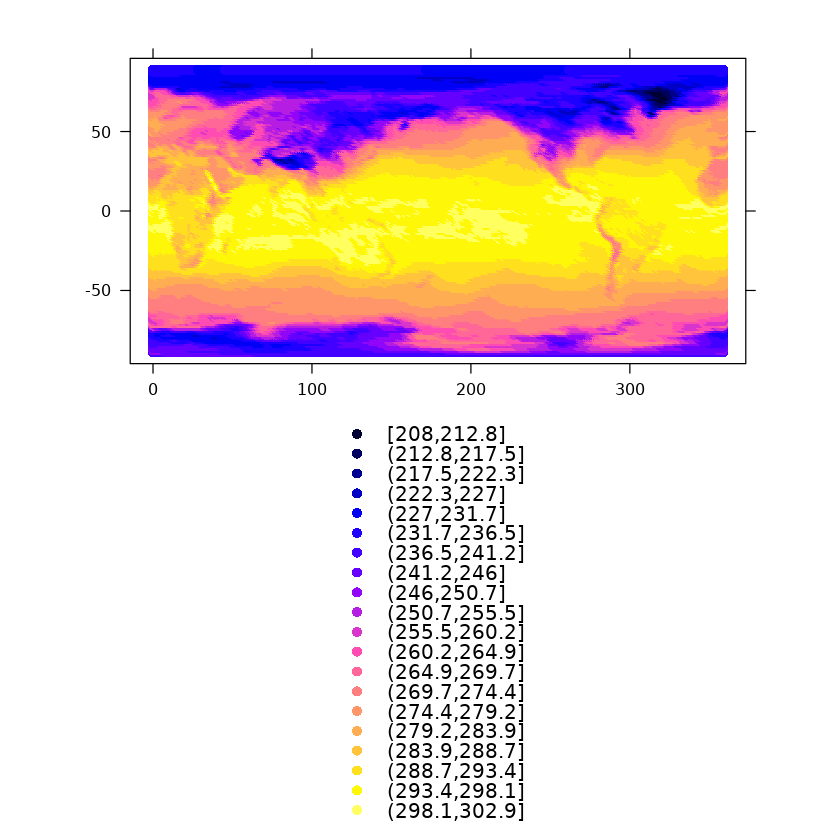

In [12]:
## transforme la grille de données en un vecteur
vcmip6 <- as.vector(cmip6) 

xlonlat <- expand.grid(xlon,xlat) 
colnames(xlonlat) <- c("xlon","xlat")
xlonlat$vcmip6 <- vcmip6

## copie de l'objet xlonlat pour afficher la carte
mapxlatlon  <- xlonlat
## transform l'objet dataframe en un objet spatial
library(sp)
coordinates(mapxlatlon) <- ~xlon+xlat
cols = bpy.colors(30)
spplot(mapxlatlon,scales = list(draw = TRUE), cuts=20, col=cols)

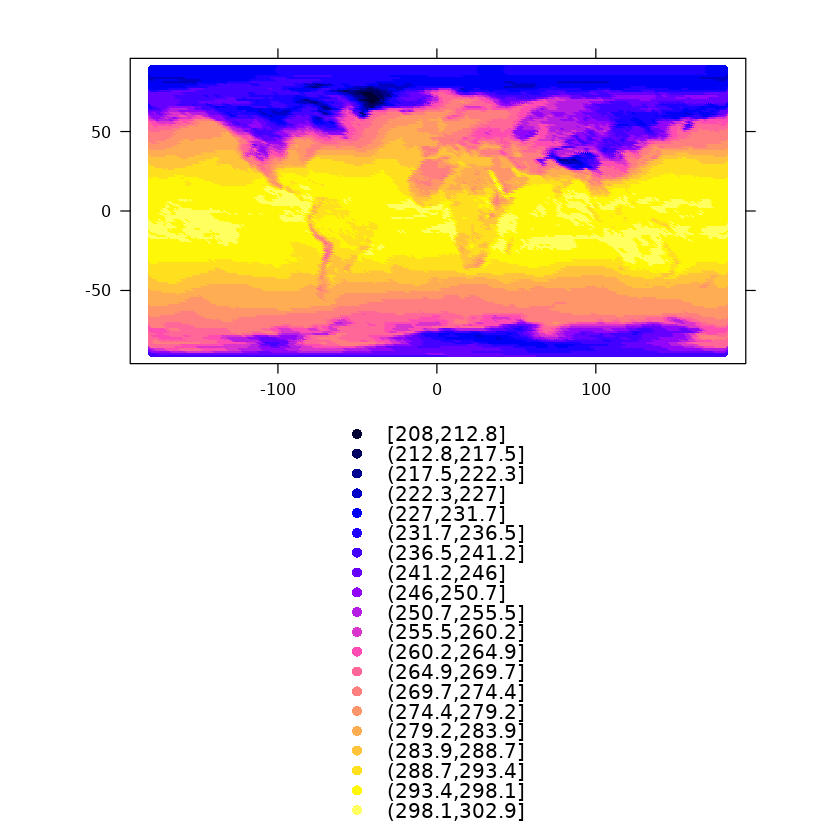

In [13]:
## passage de 0-360E à -180W-180E
lon  <-  ifelse(xlon > 180, -360 + xlon, xlon)
lonlat <- expand.grid(lon,xlat)
colnames(lonlat) <- c("lon","lat")
xlonlat <- cbind(xlonlat,lonlat)

### copie de l'objet xlonlat pour afficher la carte avec longitudes transformées
maplonlat <- xlonlat
coordinates(maplonlat) <- ~lon+lat
cols = bpy.colors(30)
spplot(maplonlat["vcmip6"],scales = list(draw = TRUE), cuts=20)

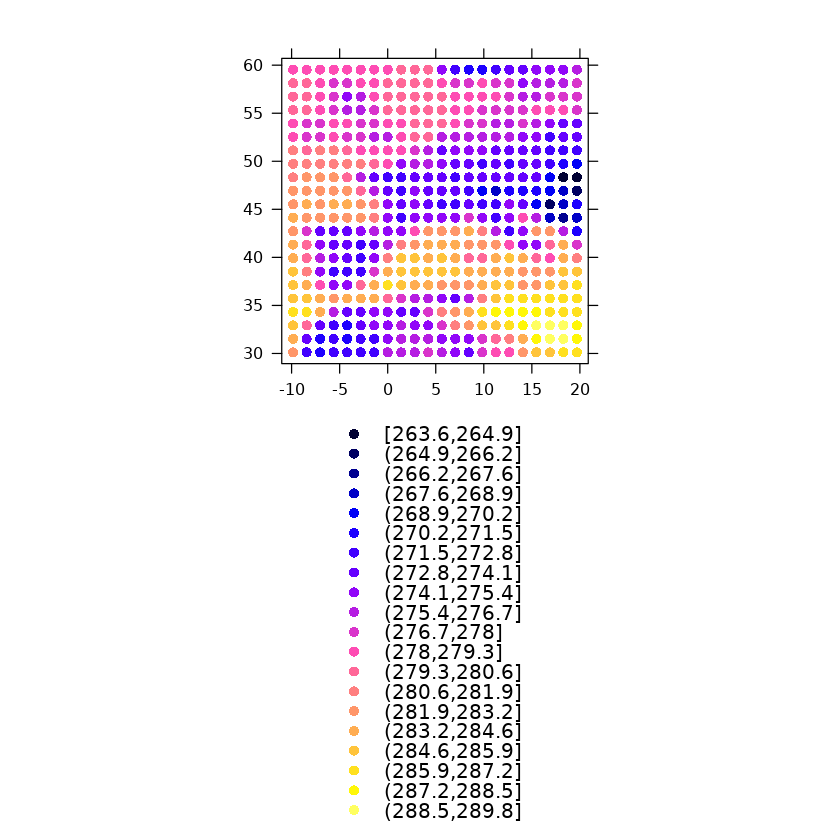

In [14]:
## Exemple d'extraction d'une zone d'intérêt avec longitudes transformées

ind <- which((xlonlat$lon > -10 & xlonlat$lon < 20) & (xlonlat$xlat > 30 & xlonlat$xlat < 60))
zoi <- xlonlat[ind,]

coordinates(zoi) <- ~lon+lat
cols = bpy.colors(30)
spplot(zoi["vcmip6"],scales = list(draw = TRUE), cuts=20)

In [41]:
######################################################################################
##
##  Partie III :Récupération des données simulées correspondantes aux stations Météo-France de BFC
##
######################################################################################

## Récupération des coordonnées des stations
MF <- read.csv("/home/thierry/works/M2SEME_UE62DownScaling/Data/MFpostes.csv",
                     header = TRUE)
MF ## Affiche les stations MF

MFdata <- read.csv("/home/thierry/works/M2SEME_UE62DownScaling/Data/MFdata.csv",
                   header=TRUE)
##MFdata <- dr29MF(MFdata) ## suprime le 29 février

## Recherche par plus proche voisin les points de grille les plus proches des stations MF
library(spatstat)
MF.ppp <- ppp(MF$lon,MF$lat,
              c(min(MF$lon),max(MF$lon)),
              c(min(MF$lat),max(MF$lat)), marks=MF$alti)

cmip6.ppp <- ppp(xlonlat$lon,xlonlat$lat,
                 c(min(xlonlat$lon),max(xlonlat$lon)),
                 c(min(xlonlat$lat),max(xlonlat$lat)),
                 marks=xlonlat$vcmip6-273.15)

ind <- nncross(MF.ppp,cmip6.ppp)$which
cind <- xlonlat[ind,c("xlon","xlat")]

X,NumStation,alti,lat,lon,LonLB2,LatLB2
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,21473001,219,47.26700,5.088,808161.5,2255559
2,25462001,831,46.90200,6.340,904877.3,2219107
3,39050001,535,46.78500,5.796,864050.9,2204148
4,39275004,1120,46.39167,5.960,878574.3,2161039
5,58062001,598,47.07000,3.934,721317.3,2231250
6,58160001,175,46.99800,3.112,658973.8,2222305
7,70006001,275,47.91500,6.338,898995.2,2331572
8,71105001,216,46.29600,4.798,789607.9,2146953
9,89387002,70,48.16700,3.288,670785.8,2352414


In [19]:
cind

,xlon,xlat
,<dbl>,<dbl>
24837,5.62500,46.92561
24838,7.03125,46.92561
24837.1,5.62500,46.92561
24837.2,5.62500,46.92561
24836,4.21875,46.92561
24835,2.81250,46.92561
25094,7.03125,48.32636
24836.1,4.21875,46.92561
25091,2.81250,48.32636


In [42]:
## indice des longitudes et des latitudes CMPI6 plus proche de la station

cindex <- as.integer(row.names(cind))
cindex
grind <- matrix(as.integer(rownames(xlonlat)),
                nrow=nrow(cmip6),ncol=ncol(cmip6))
indate <- which(mydates==as.Date("1975-01-01")) ## repère l'index de la date du 1er Janvier 1975
indate

####### création du vecteur temps pour les données cmip
st <- as.Date("1975-01-01")
en <- as.Date("2014-12-31")
ll <- seq(st, en, by = "1 day")
##ll <- dr29F(ll) 


[1] 24837 24838 24837 24837 24836 24835 25094 24836 25091

[1] 45656

In [27]:
## Boucle sur les points de grille du modèle à récupérer
## l'extraction des données sur la zone d'intèrêt peut prendre un peu de temps
mycmip6 <- c() ## Objet qui contiendra les données simulées pour les points de grille sélectionnés
for(i in 1:length(cindex)){
  gr.id <- which(grind==cindex[i],arr.ind = TRUE)
  offset <- c(gr.id[1], gr.id[2], indate) ## fixe l'origine de l'extraction
  mycount <- c(1,1,(length(xtime)-indate)+1) ## nombre d'éléments à extraires à partir de l'origine
  tmp <- ncvar_get(nc,varid="tasmin", start=offset, count=mycount) ## extration des données
  mycmip6 <- cbind(mycmip6,tmp)
}

mycmip6 <- as.data.frame(mycmip6-273.15)
colnames(mycmip6) <- as.character(MF$NumStation)

In [29]:
dim(mycmip6)
head(mycmip6)

[1] 14610     9

,21473001,25462001,39050001,39275004,58062001,58160001,70006001,71105001,89387002
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.0082764,-3.547369,-1.0082764,-1.0082764,-0.6044067,-0.5485596,-0.8120789,-0.6044067,1.221033
2,0.1353699,-3.115912,0.1353699,0.1353699,1.9086548,2.4600769,-4.6784424,1.9086548,2.365564
3,-10.4129395,-14.570990,-10.4129395,-10.4129395,-8.8724731,-8.6731323,-12.3085388,-8.8724731,-8.775519
4,-11.8789429,-16.173132,-11.8789429,-11.8789429,-9.6573853,-9.0498718,-11.8636230,-9.6573853,-8.624182
5,-11.8890442,-14.626593,-11.8890442,-11.8890442,-9.4567017,-6.6806091,-13.6939758,-9.4567017,-7.355505
6,-12.3966125,-15.345007,-12.3966125,-12.3966125,-10.8966431,-9.6678223,-13.8815063,-10.8966431,-10.048865


In [32]:
#######################################################################################
##
## Partie IV : Création des séries temporelles pour appariement données MF vs modèle
##
#######################################################################################
library(xts)
## création de séries temporelles pour chaque station de Météo-France
listMF <- split(MFdata,f=as.factor(MFdata$NumPoste))
myfunxts <- function(x){
  xdates <- as.Date(paste(x$Year,"-",x$Month,"-",x$Day, sep=""),"%Y-%m-%d")
  myxts <- xts(x[,c("Tn","Tx","RR")], order.by=xdates)
}

In [34]:
listMF.xts <- lapply(listMF, FUN = myfunxts)
MF.xts <- do.call('cbind',listMF.xts)
## si le modèle simule sur un calendrier no-leap i.e sans 29 février il faudra
## dé-commenter la ligne suivante pour enlever les 29 février
##MF.xts <- dr29MF(MF.xts)

In [40]:
dim(MF.xts)
tail(MF.xts)

[1] 20088    27

             Tn   Tx  RR Tn.1 Tx.1 RR.1 Tn.2 Tx.2 RR.2 Tn.3 Tx.3 RR.3 Tn.4 Tx.4
2015-12-26  0.8  9.2 0.2 -1.8 10.7  0.0 -1.0 13.0    0   NA   NA   NA  6.2 13.4
2015-12-27  0.4  6.4 0.0 -2.9 12.4  0.0 -2.5 14.0    0   NA   NA   NA  6.5 14.5
2015-12-28 -0.2 12.3 0.0 -3.0 15.6  0.0 -5.0 14.0    0   NA   NA   NA  4.2 13.0
2015-12-29  0.9 10.0 0.4 -1.8 11.1  0.2 -3.0 10.5    1   NA   NA   NA  5.9  9.2
2015-12-30 -0.5  7.1 0.6 -4.7 10.4  0.0 -4.5 10.5    1   NA   NA   NA  3.0  9.7
2015-12-31  1.4  9.4 2.2  2.0  6.7  2.6 -2.5  8.0    4   NA   NA   NA  5.2  7.4
           RR.4 Tn.5 Tx.5 RR.5 Tn.6 Tx.6 RR.6 Tn.7 Tx.7 RR.7 Tn.8 Tx.8 RR.8
2015-12-26  0.0  1.3 12.5  0.0  4.5 14.5  0.4  3.8 13.4  0.2  4.5 14.7  0.0
2015-12-27  0.0  2.8 12.4  0.0  2.0 12.5  0.2  3.8 11.1  0.0  5.6 14.0  0.0
2015-12-28  0.0  0.9 14.2  0.2 -1.0 11.0  0.2  2.8 14.7  0.0 -0.3 13.7  0.0
2015-12-29  0.2  2.1 12.9  4.6 -3.0 13.0  0.0  4.8 11.6  0.2  3.5 12.7  0.0
2015-12-30  4.4 -1.1  8.7  3.4  0.0 11.0  2.6 -0.2  9.4  2.4

In [46]:
length(ll)
dim(mycmip6)

[1] 14610

[1] 14610     9

In [50]:
## création de séries temporelles pour les données du modèle
CMIP6.xts <- xts(mycmip6, order.by = ll)

In [52]:
head(CMIP6.xts)

              21473001   25462001    39050001    39275004    58062001
1975-01-01  -1.0082764  -3.547369  -1.0082764  -1.0082764  -0.6044067
1975-01-02   0.1353699  -3.115912   0.1353699   0.1353699   1.9086548
1975-01-03 -10.4129395 -14.570990 -10.4129395 -10.4129395  -8.8724731
1975-01-04 -11.8789429 -16.173132 -11.8789429 -11.8789429  -9.6573853
1975-01-05 -11.8890442 -14.626593 -11.8890442 -11.8890442  -9.4567017
1975-01-06 -12.3966125 -15.345007 -12.3966125 -12.3966125 -10.8966431
             58160001    70006001    71105001   89387002
1975-01-01 -0.5485596  -0.8120789  -0.6044067   1.221033
1975-01-02  2.4600769  -4.6784424   1.9086548   2.365564
1975-01-03 -8.6731323 -12.3085388  -8.8724731  -8.775519
1975-01-04 -9.0498718 -11.8636230  -9.6573853  -8.624182
1975-01-05 -6.6806091 -13.6939758  -9.4567017  -7.355505
1975-01-06 -9.6678223 -13.8815063 -10.8966431 -10.048865

In [53]:
###############################################################
##  La correction par Quantile Mapping sera faite par mois
## pour cela :
## 1- on identifie à quel mois appartient chacun des jours
## 2- on initialise une liste de 12 éléments i.e. 12 mois
## 3- on rassemble tous les jours de janvier dans le 1er élément de la liste puis tous les jours de février
## dans le 2ème élément de la liste and so on...
###############################################################

## sélectionne la période d'intérêt ici 1975/2014
MF.xts <- MF.xts["1975/2014"]

MFMonth <- vector("list",12)
CMIP6Month <- vector("list",12)
for(i in 0:11){
  MFMonth[[i+1]] <- as.data.frame(MF.xts[.indexmon(MF.xts) %in% i])
  CMIP6Month[[i+1]] <- as.data.frame(CMIP6.xts[.indexmon(CMIP6.xts) %in% i])
}

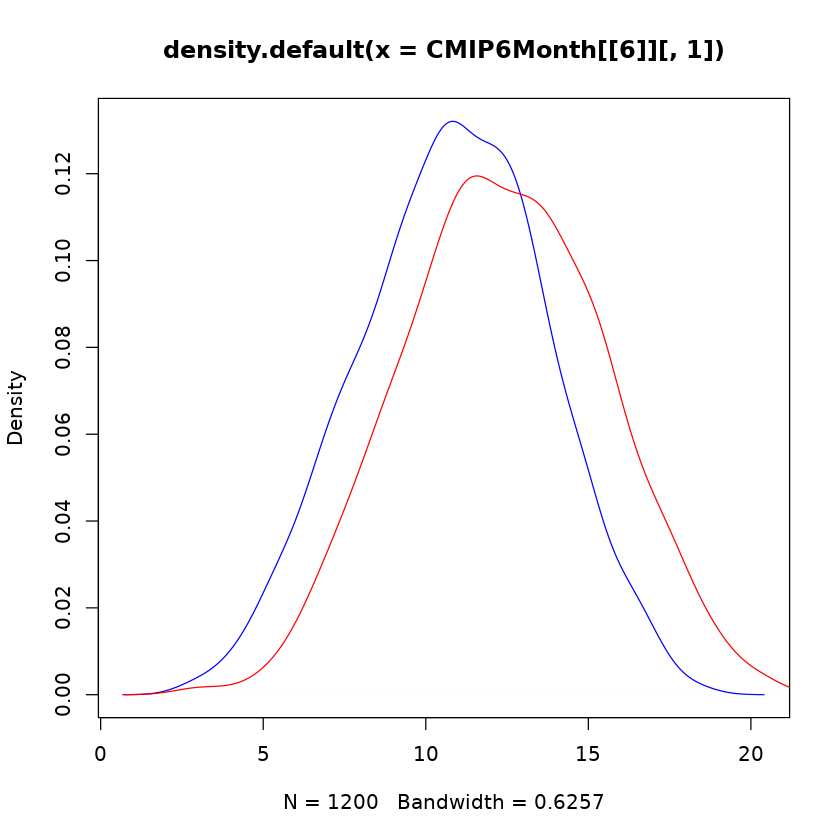

[1] 10.80324

[1] 12.38317

[1] 2.870682

[1] 3.094071

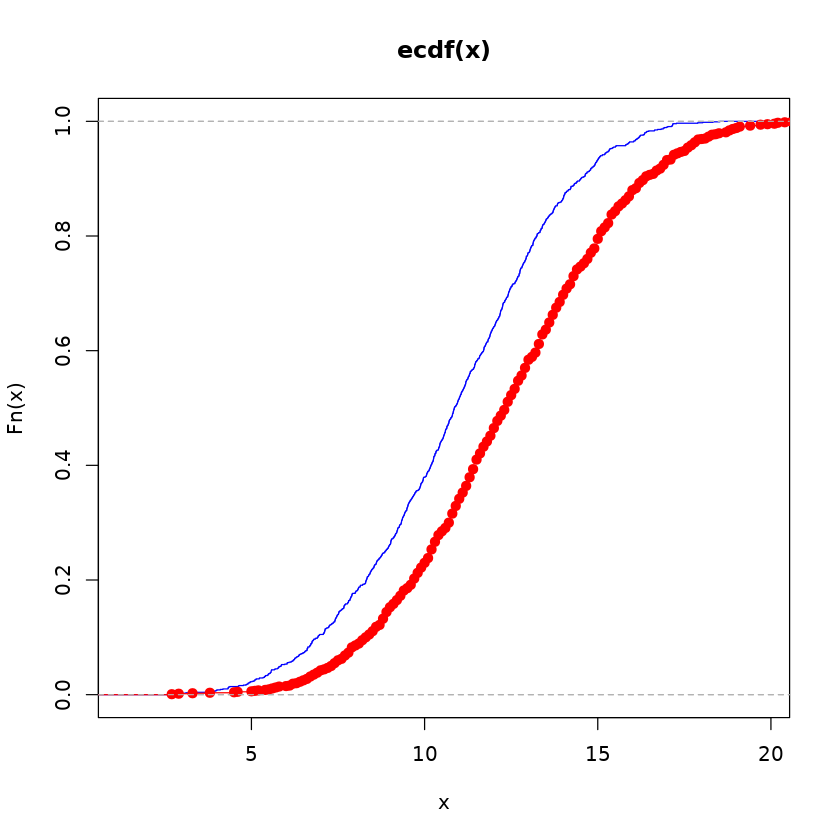

In [63]:
## compare les distributions CMIP6 vs MF
plot(density(CMIP6Month[[6]][,1]),col="blue")
lines(density(MFMonth[[6]][,1]),col="red")

plot.ecdf(CMIP6Month[[6]][,1], col="blue")
plot.ecdf(MFMonth[[6]][,1],add=T,col="red")

mean(CMIP6Month[[6]][,1])
mean(MFMonth[[6]][,1])

sd(CMIP6Month[[6]][,1])
sd(MFMonth[[6]][,1])

In [69]:
getwd()
setwd('../Data')

#####################################################################
##
##  Mise en forme des données pour le Quantile Mapping et sauvegarde 
##
##
#####################################################################

lMFMonth.Tn <- lapply(MFMonth, FUN = function(x) x[,seq(1,27,by=3)])
##lMFMonth.Tx <- lapply(MFMonth, FUN = function(x) x[,seq(2,27,by=3)])
##lMFMonth.RR <- lapply(MFMonth, FUN = function(x) x[,seq(3,27,by=3)])

MFTn.xts <- MF.xts[, seq(1,27,by=3)]

save(MFTn.xts,lMFMonth.Tn, file="lMFMonthTn.RData")

## sauve les listes des données CMIP6 
save(CMIP6.xts,CMIP6Month, file='lCMIP6MonthTn.RData')


[1] "/home/thierry/works/M2SEME_UE62_ClimatDownscaling2019/Data"

In [68]:
class(MF.xts[,c(1,4)])

[1] "xts" "zoo"